In [1]:


!pip install neuron
!pip install netpyne
import matplotlib

     |████████████████████████████████| 12.6MB 286kB/s 
     |████████████████████████████████| 317kB 4.0MB/s 


In [ ]:
rm -r netpyne-course-2021

rm: cannot remove 'netpyne-course-2021': No such file or directory


In [2]:

!git clone https://github.com/suny-downstate-medical-center/netpyne-course-2021.git


Cloning into 'netpyne-course-2021'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 100 (delta 30), reused 77 (delta 18), pack-reused 0
Receiving objects: 100% (100/100), 116.59 KiB | 5.30 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [3]:
cd netpyne-course-2021

/content/netpyne-course-2021


In [4]:
!nrnivmodl .

/content/netpyne-course-2021
Mod files: "./A.mod" "./AMPA.mod" "./ar.mod" "./cadad.mod" "./cad.mod" "./cal.mod" "./cat.mod" "./ElectSyn.mod" "./expsynstdp.mod" "./GABAa.mod" "./iholmw.mod" "./izhi2003a.mod" "./izhi2003b.mod" "./izhi2007a.mod" "./izhi2007b.mod" "./k2.mod" "./kacurrent.mod" "./kahp.mod" "./ka.mod" "./kca.mod" "./kc.mod" "./kdrcurrent.mod" "./kdr.mod" "./km2.mod" "./km.mod" "./kv.mod" "./MyExp2SynBB.mod" "./MyExp2SynNMDABB.mod" "./nacurrent.mod" "./naf.mod" "./nap.mod" "./naz.mod" "./Nca.mod" "./NMDA.mod" "./OFThpo.mod" "./OFThresh.mod" "./vecevent.mod"

Creating x86_64 directory for .o files.

COBJS=''
 -> Compiling mod_func.c
x86_64-linux-gnu-gcc -O2   -I.   -I/usr/local/lib/python3.7/dist-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 -> NMODL .././AMPA.mod
(cd "../."; MODLUNIT=/usr/local/lib/python3.7/dist-packages/neuron/.data/share/nrn/lib/nrnunits.lib /usr/local/lib/python3.7/dist-packages/neuron/.data/bin/nocmodl AMPA


Start time:  2021-05-20 18:40:59.847432

Creating network of 10 cell populations on 1 hosts...
  Number of cells on node 0: 50 
  Done; cell creation time = 0.30 s.
Making connections...
  Number of connections on node 0: 319 
  Number of synaptic contacts on node 0: 322 
  Done; cell connection time = 0.04 s.
Adding stims...
  Number of stims on node 0: 50 
  Done; cell stims creation time = 0.01 s.
Recording 10 traces of 1 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 32.17 s; real-time ratio: 0.03.

Gathering data...
  Done; gather time = 0.30 s.

Analyzing...
  Cells: 50
  Connections: 369 (7.38 per cell)
  Synaptic contacts: 372 (7.44 per cell)
  Spikes: 3122 (62.44 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 32.17 s
  Done; saving time = 0.02 s.
Plotting raster...


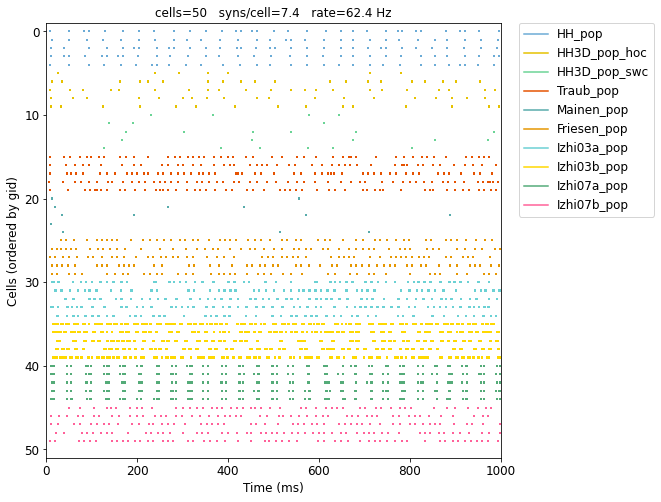

Plotting recorded cell traces ... cell


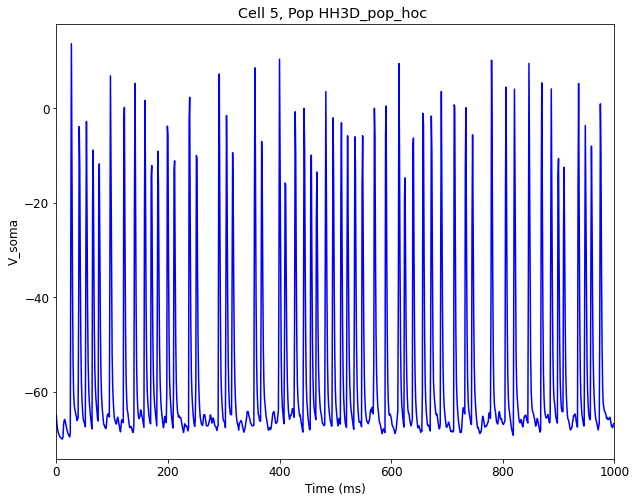

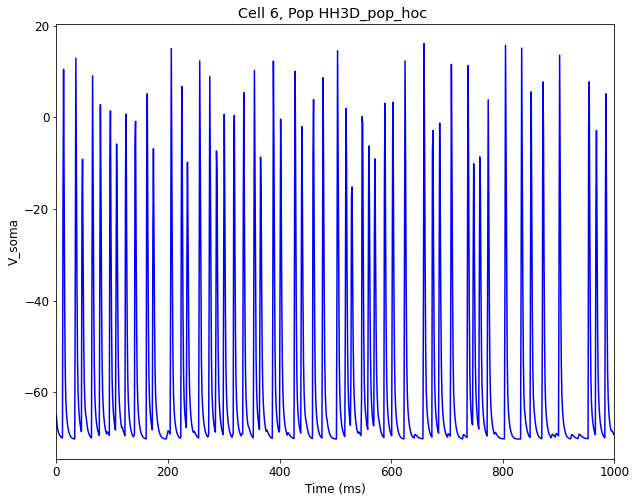

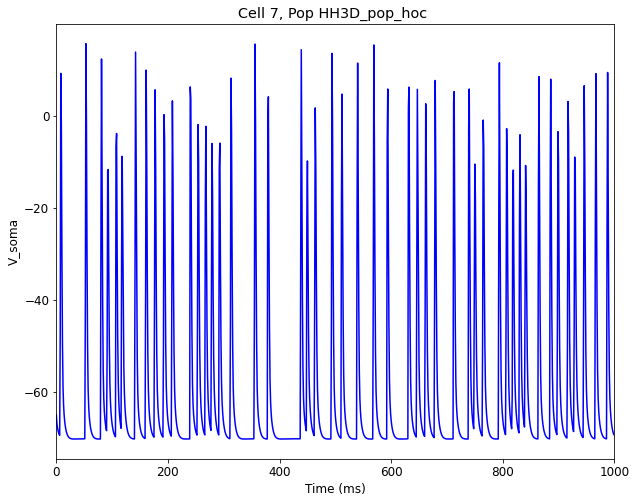

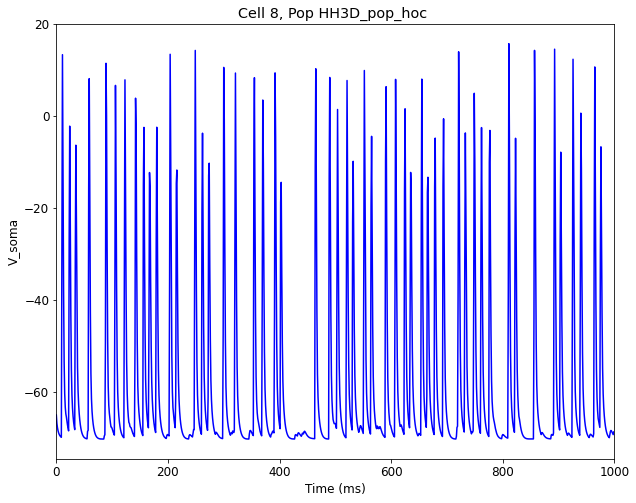

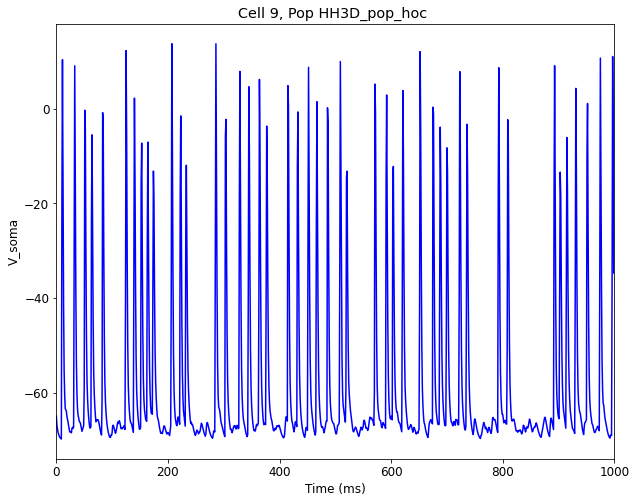

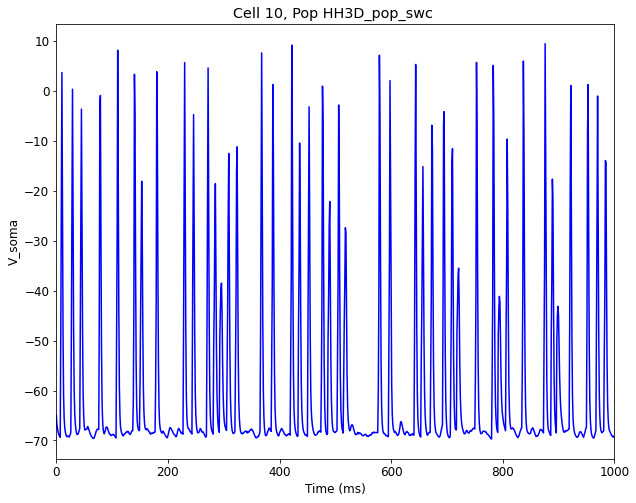

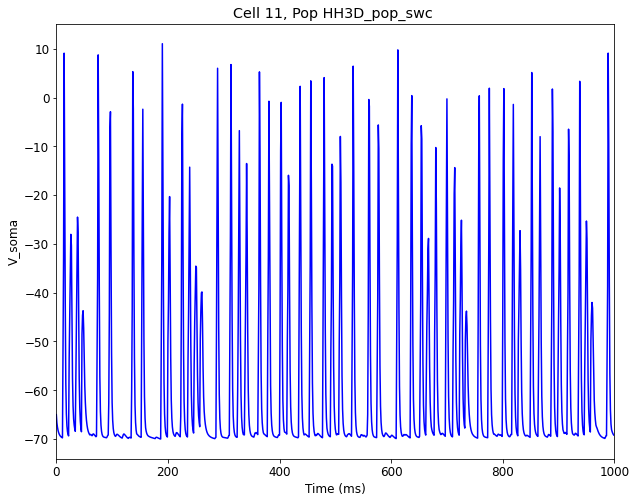

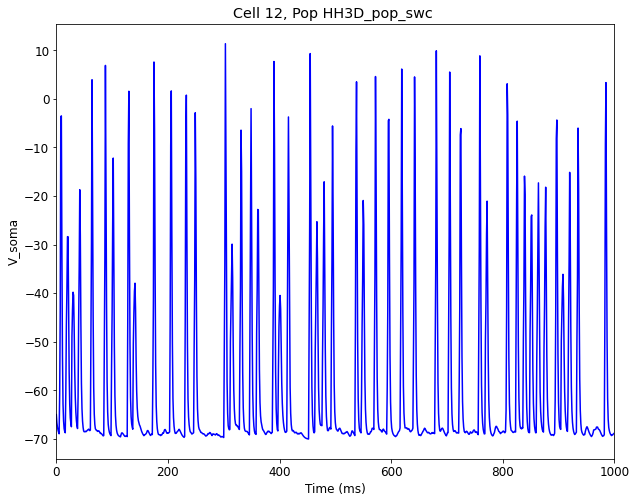

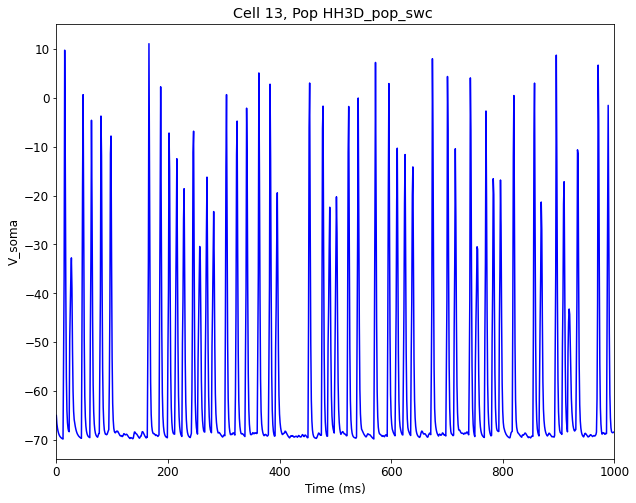

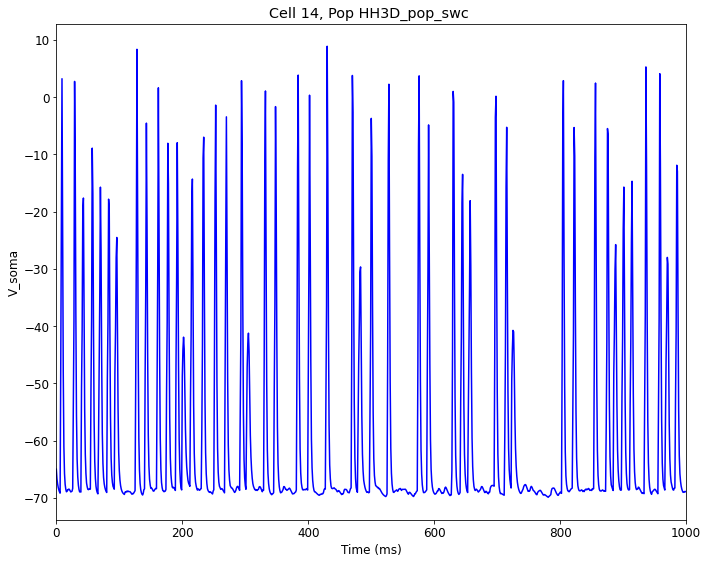

  Done; plotting time = 3.06 s

Total time = 35.91 s

End time:  2021-05-20 18:41:35.759457


In [ ]:
from netpyne import specs, sim
%matplotlib inline

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

## Population parameters
netParams.popParams['HH_pop'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'HH'}
netParams.popParams['HH3D_pop_hoc'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'HH3D_hoc'}
netParams.popParams['HH3D_pop_swc'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'HH3D_swc'}
netParams.popParams['Traub_pop'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'Traub'}
netParams.popParams['Mainen_pop'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'Mainen'}
netParams.popParams['Friesen_pop'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'Friesen'}
netParams.popParams['Izhi03a_pop'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'Izh2003a'}
netParams.popParams['Izhi03b_pop'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'Izh2003b'}
netParams.popParams['Izhi07a_pop'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'Izh2007a'}
netParams.popParams['Izhi07b_pop'] = {'cellType': 'PYR', 'numCells': 5, 'cellModel': 'Izh2007b'}


### HH
netParams.importCellParams(
    label='PYR_HH_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'HH'},
    fileName='HHCellFile.py', 
    cellName='HHCellClass', 
    importSynMechs=True,
    )


### HH3D HOC
cellRule = netParams.importCellParams(
    label='PYR_HH3D_hoc_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'HH3D_hoc'},
    fileName='geom.hoc', 
    cellName='E21', 
    importSynMechs=False,
    )
cellRule['secs']['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}
for secName in cellRule['secs']:
    cellRule['secs'][secName]['mechs']['pas'] = {'g': 0.0000357, 'e': -70}
    cellRule['secs'][secName]['geom']['cm'] = 1


### HH3D SWC
cellRule = netParams.importCellParams(
    label='PYR_HH3D_swc_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'HH3D_swc'},
    fileName='BS0284.swc', 
    cellName='BS0284',
    )
netParams.renameCellParamsSec('PYR_HH3D_swc_rule', 'soma_0', 'soma')  # rename imported section 'soma_0' to 'soma'
for secName in cellRule['secs']:
    cellRule['secs'][secName]['mechs']['pas'] = {'g': 0.0000357, 'e': -70}
    cellRule['secs'][secName]['geom']['cm'] = 1
    if secName.startswith('soma'):
        cellRule['secs'][secName]['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}


### Traub
cellRule = netParams.importCellParams(
    label='PYR_Traub_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'Traub'},
    fileName='pyr3_traub.hoc', 
    cellName='pyr3',
    )
somaSec = cellRule['secLists']['Soma'][0]
cellRule['secs'][somaSec]['spikeGenLoc'] = 0.5


### Mainen
netParams.importCellParams(
    label='PYR_Mainen_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'Mainen'},
    fileName='mainen.py', 
    cellName='PYR2',
    )


### Friesen
cellRule = netParams.importCellParams(
    label='PYR_Friesen_rule', 
    conds={'cellType': 'PYR', 'cellModel': 'Friesen'},
    fileName='friesen.py', 
    cellName='MakeRSFCELL',
    )
cellRule['secs']['axon']['spikeGenLoc'] = 0.5


### Izhi2003a (independent voltage)
cellRule = netParams.importCellParams(
    label='PYR_Izhi03a_rule', 
    conds={'cellType': 'PYR', 'cellModel':'Izh2003a'},
    fileName='izhi2003Wrapper.py', 
    cellName='IzhiCell',
    cellArgs={'type':'tonic spiking', 'host':'dummy'},
    )
netParams.renameCellParamsSec('PYR_Izhi03a_rule', 'sec', 'soma')  # rename imported section 'sec' to 'soma'
cellRule['secs']['soma']['pointps']['Izhi2003a_0']['vref'] = 'V' # specify that uses its own voltage V


### Izhi2003b (section voltage)
netParams.importCellParams(
    label='PYR_Izhi03b_rule', 
    conds={'cellType': 'PYR', 'cellModel':'Izh2003b'},
    fileName='izhi2003Wrapper.py', 
    cellName='IzhiCell',  
    cellArgs={'type':'tonic spiking'},
    )


### Izhi2007a (independent voltage)
cellRule = netParams.importCellParams(
    label='PYR_Izhi07a_rule', 
    conds={'cellType': 'PYR', 'cellModel':'Izh2007a'},
    fileName='izhi2007Wrapper.py', 
    cellName='IzhiCell',  
    cellArgs={'type':'RS', 'host':'dummy'},
    )
netParams.renameCellParamsSec('PYR_Izhi07a_rule', 'sec', 'soma')  # rename imported section 'sec' to 'soma'
cellRule['secs']['soma']['pointps']['Izhi2007a_0']['vref'] = 'V' # specify that uses its own voltage V
cellRule['secs']['soma']['pointps']['Izhi2007a_0']['synList'] = ['AMPA', 'NMDA', 'GABAA', 'GABAB']  # specify its own synapses


### Izhi2007b (section voltage)
netParams.importCellParams(
    label='PYR_Izhi07b_rule', 
    conds={'cellType': 'PYR', 'cellModel':'Izh2007b'},
    fileName='izhi2007Wrapper.py', 
    cellName='IzhiCell',  
    cellArgs={'type':'RS'},
    )


## Synaptic mechanism parameters
netParams.synMechParams['AMPA'] = {'mod': 'Exp2Syn', 'tau1': 1.0, 'tau2': 5.0, 'e': 0}  # soma NMDA synapse


# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 50, 'noise': 0.5}
netParams.stimTargetParams['bg1'] = {'source': 'bkg', 'conds': {'cellType': 'PYR', 'cellModel': ['Traub', 'HH', 'HH3D_hoc', 'HH3D_swc', 'Mainen', 'Izh2003b', 'Izh2007b']}, 'weight': 0.1, 'delay': 5, 'sec': 'soma'}
netParams.stimTargetParams['bg2'] = {'source': 'bkg', 'conds': {'cellType': 'PYR', 'cellModel': ['Friesen','Izh2003a', 'Izh2007a']}, 'weight': 5, 'delay': 5, 'sec': 'soma'}


## Connectivity params
netParams.connParams['recurrent'] = {
    'preConds': {'cellType': 'PYR'}, 
    'postConds': {'cellType': 'PYR'},  #  PYR -> PYR random
    'connFunc': 'convConn',           # connectivity function (random)
    'convergence': 'uniform(0,10)',   # max number of incoming conns to cell
    'weight': 0.001,                  # synaptic weight
    'delay': 5,                       # transmission delay (ms)
    'sec': 'soma'}                    # section to connect to

netParams.connParams['HH->izhi07a'] = {
    'preConds': {'pop': 'HH_pop'}, 
    'postConds': {'pop': 'Izhi07a_pop'}, # background -> PYR (weight=0.1)
    'connFunc': 'fullConn',     # connectivity function (all-to-all)
    'weight': 5,                # synaptic weight
    'delay': 5,                 # transmission delay (ms)
    'sec': 'soma'}              # section to connect to

netParams.connParams['izhi07a->HH'] = {
    'preConds': {'pop': 'Izhi07a_pop'}, 
    'postConds': {'pop': 'HH_pop'}, # background -> PYR (weight=0.1)
    'connFunc': 'fullConn',     # connectivity function (all-to-all)
    'weight': 0.1,              # synaptic weight
    'delay': 5,                 # transmission delay (ms)
    'sec': 'soma'}              # section to connect to


# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration
simConfig.duration = 1*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.025                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma': {'sec': 'soma', 'loc': 0.5, 'var': 'v'}}
simConfig.recordStep = 1            # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'model_output' # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file
simConfig.analysis['plotRaster'] = {'orderInverse': True, 'saveFig': 'tut_import_raster.png'}           
simConfig.analysis['plotTraces'] = {'include': ['HH3D_pop_hoc', 'HH3D_pop_swc']}            


# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)


In [ ]:
!rm -r x86_64
